# Importamos las Librerías

In [469]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

* Recordatorio: De implementarse necesariamente cambios en nuestro "Dataframe", lo mejor es trabajar con una copia 

# Carga de Archivo CSV

In [470]:
#Leemos el csv
df_ = pd.read_csv("actividad.csv")
#df_ es nuestro dataframe original!!

In [471]:
#Vizualizamos una pequeña muestra
df_.sample()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
11310,Yakomo,2019-08-01 15:40:33,00:20:43,NaN,Johnny Test: Temporada 2: Johnny's Pet Day / P...,NaN,Sony PS4,00:21:43,00:21:43,PE (Peru)


# Repaso de la Definición de Cada Variable en el "DATAFRAME"

* Profile Name: Se basa en el nombre del perfil, conociendo que una cuenta puede ostentar de varios. Posiblemente debamos estar al tanto de la actividad de cada uno por separado, ya que el dueño de cada perfil es un usuario completamente diferente. -lo podemos cambiar por "profile"-

* Star Time: Guarda el Tiempo exacto de inicio al reproducirse un determinado título de la plataforma -lo podemos renombrar como "time_start"-

* Duration: Nos muestra el tiempo de visualización, a partir del tiempo que iniciamos un título hasta que lo damos por finalizado. -lo podemos renombrar "duration"-

* Atributes: Alguna peculiaridad añadida a la hora de visualizar el título, en este parece referenciar a la accción de "Autoreproducción" -lo podemos renombrar como "atributes"-

* Title: Se refiere al título del respectivo material audiovisual que se ha reproducido. -lo podemos renombrar como "title"-

* Suplemental Video Type: Visualizando los datos por encima, vemos que identifica si algún material reproducido funciona como sumplemeto a un material mucho más robusto. Por ejemplo puede ser un Trailer o un Teaser, en términos generales avances o contenidos que complementan la experiencia. - lo podemos llamar como "suple_type"

* Device Type: Guarda exactamente desde que tipo de dispositivo se tuvo lugar la respectiva reproducción. -lo podemos llamar como "device"-

* Para propósitos de un Análisis por el momento básico descartaremos las 3 últimas columnas, las de bookmark porque no consideremos que aporten gran valor y la  del país donde se provocó la reproducción, dado a que el 100% de los datos se obtuvieron en Perú. Aunque igualmente es un dato que no deberíamos olvidar. 

# Procedemos a renombrar las columnas como lo estipulamos
# También eliminaremos las 3 últimas columnas ["Bookmark","Latest Bookmark","Country"]

In [472]:
#Creamos la copia de nuestro DataFrame
df = df_.copy()

In [473]:
#Procedemos a elminar las 3 últimas columnas
df.drop(["Bookmark","Latest Bookmark","Country"], axis=1,inplace=True)

* Nota: Normalmente se renombran las columnas para facilitar nuestro trabajo al digitar los nombres de las variables
* Para esto no debemos olvidar las buenas prácticas a la hora de nombrar una variable (en este caso columna)

In [474]:
#De esta forma renombramos nuestras columnas
df.columns = ["profile","time_start","duration","atributes","title","suple_type","device"]

In [475]:
df

,profile,time_start,duration,atributes,title,suple_type,device
0,Kids,2019-12-28 14:14:17,00:13:33,Autoplayed: user action: Unspecified;,Kung Fu Panda,NaN,Sony Sony Android TV 2018 M2 4K Smart TV
1,Kids,2018-12-10 18:48:27,00:16:49,NaN,Toy Story: olvidados en el tiempo,NaN,Android DefaultWidevineL3Phone Android Phone
2,Kids,2018-12-06 02:12:19,00:08:11,Autoplayed: user action: None;,"Pocoyó: Temporada 1: ¡Busca, Loula, busca! / L...",NaN,Samsung 2014 MStar DTV
3,Kids,2018-12-06 01:45:37,00:26:20,Autoplayed: user action: Unspecified;,Pocoyó: Temporada 1: Un día de lluvia / ¡Músic...,NaN,Samsung 2014 MStar DTV
4,Kids,2018-12-06 01:35:35,00:01:13,Autoplayed: user action: None;,La casa de Mickey Mouse: Temporada 2: ¡Pluto a...,NaN,Samsung 2014 MStar DTV
...,...,...,...,...,...,...,...
14857,Yakomo,2018-05-23 21:21:51,00:02:49,NaN,Sword Art Online: Sword Art Online II: Un pequ...,NaN,Sony PS4
14858,Yakomo,2018-05-23 21:04:49,00:14:54,Autoplayed: user action: Unspecified;,Sword Art Online: Sword Art Online II: Phantom...,NaN,Sony PS4
14859,Yakomo,2018-05-23 21:03:12,00:01:32,NaN,Sword Art Online: Sword Art Online II: Phantom...,NaN,Sony PS4
14860,Yakomo,2018-05-23 20:42:08,00:20:54,NaN,Sword Art Online: Sword Art Online II: Bala fa...,NaN,Sony PS4


# Realizando una pequeña revisión "profile"

* Dado que en la variable profile (perfiles) se encuentran datos de otras personas, no deseo vulnerar la privacidad de terceros por lo cual solo enfocaré este análisis a mi persona. 
* Para llevar a cabo ello, lo mejor sería visualizar qué perfiles están involucrados en la tabla..

In [476]:
#Cuales son esos perfiles?
df["profile"].value_counts()

Yakomo    9140
Y         5684
Kids        38
Name: profile, dtype: int64

# Conclusión de la Revisión

* Los perfiles involucrados son 3:
    * El que le pertenece a mi persona "Yakomo"
    * Un segundo denominado "Y" para proteger su privacidad
    * Un Tercero llamado Kids, perfil que contiene protección parental.

* Como este análisis esta dirigido a analizar el comportamiento de mi perfil personal procederemos a descartar aquellos perfiles que no tengan la denominación "Yakomo" 
* O mejor aún, solo trabajemos con los datos que aludan al nombre de mi propio perfil ¿Cómo lo Haremos?

In [477]:
#Creamos una condición que signifique [Pefil es Yakomo]
condicion = df["profile"] == "Yakomo"
#Teniendo la condición lista solo la debemos invocar de la siguiente manera. 
df[condicion]


,profile,time_start,duration,atributes,title,suple_type,device
5722,Yakomo,2022-04-11 18:38:28,00:13:25,NaN,La vida desastrosa de Saiki K.: Temporada 2: E...,NaN,Sony Sony Android TV 2018 M2 4K Smart TV
5723,Yakomo,2022-04-11 18:13:46,00:20:58,Autoplayed: user action: User_Interaction;,La vida desastrosa de Saiki K.: Temporada 2: E...,NaN,Sony Sony Android TV 2018 M2 4K Smart TV
5724,Yakomo,2022-04-11 13:41:14,00:19:31,NaN,La vida desastrosa de Saiki K.: Temporada 2: E...,NaN,Sony Sony Android TV 2018 M2 4K Smart TV
5725,Yakomo,2022-04-11 13:32:44,00:08:26,NaN,La vida desastrosa de Saiki K.: Temporada 2: E...,NaN,Sony Sony Android TV 2018 M2 4K Smart TV
5726,Yakomo,2022-04-11 13:32:15,00:00:18,Autoplayed: user action: None;,Tiger & Bunny: TIGER & BUNNY: Season 1_hook_01...,HOOK,Sony Sony Android TV 2018 M2 4K Smart TV
...,...,...,...,...,...,...,...
14857,Yakomo,2018-05-23 21:21:51,00:02:49,NaN,Sword Art Online: Sword Art Online II: Un pequ...,NaN,Sony PS4
14858,Yakomo,2018-05-23 21:04:49,00:14:54,Autoplayed: user action: Unspecified;,Sword Art Online: Sword Art Online II: Phantom...,NaN,Sony PS4
14859,Yakomo,2018-05-23 21:03:12,00:01:32,NaN,Sword Art Online: Sword Art Online II: Phantom...,NaN,Sony PS4
14860,Yakomo,2018-05-23 20:42:08,00:20:54,NaN,Sword Art Online: Sword Art Online II: Bala fa...,NaN,Sony PS4


* Listo ahora solo nos queda reemplazar nuestro dataframe de trabajo para que solo trabajemos con lo obtenido

In [478]:
#Estamos casi listos para trabajar
df = df[condicion]

In [479]:
#Como vemos el dataframe ahora solo contiene un perfil
df["profile"].value_counts()

Yakomo    9140
Name: profile, dtype: int64

In [480]:
df

,profile,time_start,duration,atributes,title,suple_type,device
5722,Yakomo,2022-04-11 18:38:28,00:13:25,NaN,La vida desastrosa de Saiki K.: Temporada 2: E...,NaN,Sony Sony Android TV 2018 M2 4K Smart TV
5723,Yakomo,2022-04-11 18:13:46,00:20:58,Autoplayed: user action: User_Interaction;,La vida desastrosa de Saiki K.: Temporada 2: E...,NaN,Sony Sony Android TV 2018 M2 4K Smart TV
5724,Yakomo,2022-04-11 13:41:14,00:19:31,NaN,La vida desastrosa de Saiki K.: Temporada 2: E...,NaN,Sony Sony Android TV 2018 M2 4K Smart TV
5725,Yakomo,2022-04-11 13:32:44,00:08:26,NaN,La vida desastrosa de Saiki K.: Temporada 2: E...,NaN,Sony Sony Android TV 2018 M2 4K Smart TV
5726,Yakomo,2022-04-11 13:32:15,00:00:18,Autoplayed: user action: None;,Tiger & Bunny: TIGER & BUNNY: Season 1_hook_01...,HOOK,Sony Sony Android TV 2018 M2 4K Smart TV
...,...,...,...,...,...,...,...
14857,Yakomo,2018-05-23 21:21:51,00:02:49,NaN,Sword Art Online: Sword Art Online II: Un pequ...,NaN,Sony PS4
14858,Yakomo,2018-05-23 21:04:49,00:14:54,Autoplayed: user action: Unspecified;,Sword Art Online: Sword Art Online II: Phantom...,NaN,Sony PS4
14859,Yakomo,2018-05-23 21:03:12,00:01:32,NaN,Sword Art Online: Sword Art Online II: Phantom...,NaN,Sony PS4
14860,Yakomo,2018-05-23 20:42:08,00:20:54,NaN,Sword Art Online: Sword Art Online II: Bala fa...,NaN,Sony PS4


# 2.- FASE DE ANÁLISIS EXPLORATORIO


* Una vez a grandes rasgos hemos obtenido la tabla o "dataframe" con el cual trabajaremos, es momento de analizar detenidamente nuestros dataframe y con ello sus variables. 
* ¿Son todas necesarias? ¿Tienen un Formato Adecuado? ¿Son del tipo de Dato Adecuado?
* Esas son algunas preguntas de las cuales debemos responder

Empecemos por el Dataframe como tal...

* ¿Cuál es su dimensión?

In [481]:
df.shape

(9140, 7)

Respuesta: Contamos con un Dataframe de 9140 filas o registros, enfrentadas con 7 variables o columnas

* ¿Cuál es la información más resaltante en la tabla?

In [482]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9140 entries, 5722 to 14861
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   profile     9140 non-null   object
 1   time_start  9140 non-null   object
 2   duration    9140 non-null   object
 3   atributes   5573 non-null   object
 4   title       9140 non-null   object
 5   suple_type  765 non-null    object
 6   device      9140 non-null   object
dtypes: object(7)
memory usage: 571.2+ KB


Respuesta: 
* Nombres de las columnas: profile,time_start,duration,atributes,title,suple_type,device
* Tipos de cada variable: Todas son Object ¿Deberían ser todas así? [un tipo dato object no es específico, pero suele tomarse como string]
* Importante!! Encontramos valores faltantes en los siguientes apartados: atributes y en suple_type [Algo normal dado a que son opcionales]
* En la mayoría de casos sería admisible que nuestras variables fueran objeto, sin embargo time_start podría trabajarse de manera mucho más profunda ¿Cómo?

# Trabajando la variable "time_start"

In [483]:
#Repasemos como suele verse esta variable
df["time_start"]

5722     2022-04-11 18:38:28
5723     2022-04-11 18:13:46
5724     2022-04-11 13:41:14
5725     2022-04-11 13:32:44
5726     2022-04-11 13:32:15
                ...         
14857    2018-05-23 21:21:51
14858    2018-05-23 21:04:49
14859    2018-05-23 21:03:12
14860    2018-05-23 20:42:08
14861    2018-05-23 20:41:19
Name: time_start, Length: 9140, dtype: object

* Vemos que por un lado se muestra la fecha en la que se produce la reproducción y "separado por un espacio", de inmediato nos muestra la hora, minuto y segundo en el que se realiza la misma reproducción.
* Lo que nos hace pensar... es esto "conveniente?"

Según expertos lo mejor es siempre tener un manejo por fechas separado de cualquier otro valor, esto nos otorgará habilidades de análisis muchísimo más poderosas. 

In [484]:
#Perfecto veamos qué hacer
df

,profile,time_start,duration,atributes,title,suple_type,device
5722,Yakomo,2022-04-11 18:38:28,00:13:25,NaN,La vida desastrosa de Saiki K.: Temporada 2: E...,NaN,Sony Sony Android TV 2018 M2 4K Smart TV
5723,Yakomo,2022-04-11 18:13:46,00:20:58,Autoplayed: user action: User_Interaction;,La vida desastrosa de Saiki K.: Temporada 2: E...,NaN,Sony Sony Android TV 2018 M2 4K Smart TV
5724,Yakomo,2022-04-11 13:41:14,00:19:31,NaN,La vida desastrosa de Saiki K.: Temporada 2: E...,NaN,Sony Sony Android TV 2018 M2 4K Smart TV
5725,Yakomo,2022-04-11 13:32:44,00:08:26,NaN,La vida desastrosa de Saiki K.: Temporada 2: E...,NaN,Sony Sony Android TV 2018 M2 4K Smart TV
5726,Yakomo,2022-04-11 13:32:15,00:00:18,Autoplayed: user action: None;,Tiger & Bunny: TIGER & BUNNY: Season 1_hook_01...,HOOK,Sony Sony Android TV 2018 M2 4K Smart TV
...,...,...,...,...,...,...,...
14857,Yakomo,2018-05-23 21:21:51,00:02:49,NaN,Sword Art Online: Sword Art Online II: Un pequ...,NaN,Sony PS4
14858,Yakomo,2018-05-23 21:04:49,00:14:54,Autoplayed: user action: Unspecified;,Sword Art Online: Sword Art Online II: Phantom...,NaN,Sony PS4
14859,Yakomo,2018-05-23 21:03:12,00:01:32,NaN,Sword Art Online: Sword Art Online II: Phantom...,NaN,Sony PS4
14860,Yakomo,2018-05-23 20:42:08,00:20:54,NaN,Sword Art Online: Sword Art Online II: Bala fa...,NaN,Sony PS4


Se nos puede ocurrir separar los datos en como tal "date" y el propio "tiempo de inicio"

In [485]:
#Creamos una lista "date" que se generara a partir de la serie df["time_start"]
date = [elemento.split(" ")[0] for elemento in df["time_start"]] #Con split creamos una lista con los elementos separados por (" ") usamos [0] ya que la fecha es el primer elemento
time_start = [elemento.split(" ")[1] for elemento in df["time_start"]]

Poseyendo las listas con los datos necesarios, procedemos a modificar y/o crear columnas según convenga.

In [486]:
#Para esto usamos la función assign, donde recibe como parámetro ("nombre de la columna" = "objeto_iterable", en nuestro caso una lista)
df = df.assign(date = date,time_start=time_start)
#Si la columna existe, la reemplazará, de no existir se creará. 

In [487]:
df

,profile,time_start,duration,atributes,title,suple_type,device,date
5722,Yakomo,18:38:28,00:13:25,NaN,La vida desastrosa de Saiki K.: Temporada 2: E...,NaN,Sony Sony Android TV 2018 M2 4K Smart TV,2022-04-11
5723,Yakomo,18:13:46,00:20:58,Autoplayed: user action: User_Interaction;,La vida desastrosa de Saiki K.: Temporada 2: E...,NaN,Sony Sony Android TV 2018 M2 4K Smart TV,2022-04-11
5724,Yakomo,13:41:14,00:19:31,NaN,La vida desastrosa de Saiki K.: Temporada 2: E...,NaN,Sony Sony Android TV 2018 M2 4K Smart TV,2022-04-11
5725,Yakomo,13:32:44,00:08:26,NaN,La vida desastrosa de Saiki K.: Temporada 2: E...,NaN,Sony Sony Android TV 2018 M2 4K Smart TV,2022-04-11
5726,Yakomo,13:32:15,00:00:18,Autoplayed: user action: None;,Tiger & Bunny: TIGER & BUNNY: Season 1_hook_01...,HOOK,Sony Sony Android TV 2018 M2 4K Smart TV,2022-04-11
...,...,...,...,...,...,...,...,...
14857,Yakomo,21:21:51,00:02:49,NaN,Sword Art Online: Sword Art Online II: Un pequ...,NaN,Sony PS4,2018-05-23
14858,Yakomo,21:04:49,00:14:54,Autoplayed: user action: Unspecified;,Sword Art Online: Sword Art Online II: Phantom...,NaN,Sony PS4,2018-05-23
14859,Yakomo,21:03:12,00:01:32,NaN,Sword Art Online: Sword Art Online II: Phantom...,NaN,Sony PS4,2018-05-23
14860,Yakomo,20:42:08,00:20:54,NaN,Sword Art Online: Sword Art Online II: Bala fa...,NaN,Sony PS4,2018-05-23


Como apreciación, vemos que en verdad tener la variable profile con un único valor no es que nos aporte mucha información. Solo debemos de tener en cuenta siempre a quien pertenece.

In [488]:
#Procedemos a Despojarnos de  la columna perfil
df.drop(["profile"], axis=1,inplace=True) #Inplace = True, modifica nuestro dataframe sometido.
df.reset_index(drop=True,inplace=True) #Drop True es casi 100% necesario, nuevamente inplace = True

# Es momento de "Castear" el Dato Fecha

* Si bien tenemos el apartado fecha, recordemos que su tipo de dato posiblemente no corresponda al adecuado. 

In [489]:
df.dtypes

time_start    object
duration      object
atributes     object
title         object
suple_type    object
device        object
date          object
dtype: object

In [490]:
#Entonces transformaremos la columna date en una de formato fecha
df["date"] = pd.to_datetime(df["date"])

In [491]:
#Corroboramos dicho Cambio
df.dtypes

time_start            object
duration              object
atributes             object
title                 object
suple_type            object
device                object
date          datetime64[ns]
dtype: object

In [492]:
#Comprobamos nuestro data_frame
df.head(5)

,time_start,duration,atributes,title,suple_type,device,date
0,18:38:28,00:13:25,NaN,La vida desastrosa de Saiki K.: Temporada 2: E...,NaN,Sony Sony Android TV 2018 M2 4K Smart TV,2022-04-11
1,18:13:46,00:20:58,Autoplayed: user action: User_Interaction;,La vida desastrosa de Saiki K.: Temporada 2: E...,NaN,Sony Sony Android TV 2018 M2 4K Smart TV,2022-04-11
2,13:41:14,00:19:31,NaN,La vida desastrosa de Saiki K.: Temporada 2: E...,NaN,Sony Sony Android TV 2018 M2 4K Smart TV,2022-04-11
3,13:32:44,00:08:26,NaN,La vida desastrosa de Saiki K.: Temporada 2: E...,NaN,Sony Sony Android TV 2018 M2 4K Smart TV,2022-04-11
4,13:32:15,00:00:18,Autoplayed: user action: None;,Tiger & Bunny: TIGER & BUNNY: Season 1_hook_01...,HOOK,Sony Sony Android TV 2018 M2 4K Smart TV,2022-04-11


# Visualizamos el contenido con Mucho más Detenemimiento, debemos encontrar PATRONES

* Por ahora dejaremos pasar las variables "time_start" y "duration" de seguro hay un método de como tratarlas, (averiguar)
* Pero que nos puede decir la variable atributes?

In [493]:
df["atributes"].value_counts()

Autoplayed: user action: None;                                   2687
Autoplayed: user action: Unspecified;                            2505
Autoplayed: user action: User_Interaction;                        310
Has branched playback;                                             39
Has branched playback; Autoplayed: user action: Unspecified;       18
Has branched playback; Autoplayed: user action: None;              12
Autoplayed: user action: Visibility_Timeout;                        2
Name: atributes, dtype: int64

* Vemos que cada atributo contiene peculiarmente un ";" al final, lo que es inadecuado. Procedemos a repararlo:

In [494]:
#Para esto creamos una función.
#Esto es recomendable ya que nuestra columna contiene valores faltantes. 
def mod_atributes(item): #Entonces recibimos un item
    if(type(item) == float): #Si este es de tipo float (el tipo de un dato None) 
        return item #No hacemos nigún cambio
    else: #de lo contrario
        item = item.strip("; ") #Eliminamos los caracteres que empañan nuestro dato
        return item #Siempre deberemos retornarlo. 

df["atributes"] = df["atributes"].apply(mod_atributes) #Aplicamos la funcion a nuestra columna correspondiente. 


In [495]:
df

,time_start,duration,atributes,title,suple_type,device,date
0,18:38:28,00:13:25,NaN,La vida desastrosa de Saiki K.: Temporada 2: E...,NaN,Sony Sony Android TV 2018 M2 4K Smart TV,2022-04-11
1,18:13:46,00:20:58,Autoplayed: user action: User_Interaction,La vida desastrosa de Saiki K.: Temporada 2: E...,NaN,Sony Sony Android TV 2018 M2 4K Smart TV,2022-04-11
2,13:41:14,00:19:31,NaN,La vida desastrosa de Saiki K.: Temporada 2: E...,NaN,Sony Sony Android TV 2018 M2 4K Smart TV,2022-04-11
3,13:32:44,00:08:26,NaN,La vida desastrosa de Saiki K.: Temporada 2: E...,NaN,Sony Sony Android TV 2018 M2 4K Smart TV,2022-04-11
4,13:32:15,00:00:18,Autoplayed: user action: None,Tiger & Bunny: TIGER & BUNNY: Season 1_hook_01...,HOOK,Sony Sony Android TV 2018 M2 4K Smart TV,2022-04-11
...,...,...,...,...,...,...,...
9135,21:21:51,00:02:49,NaN,Sword Art Online: Sword Art Online II: Un pequ...,NaN,Sony PS4,2018-05-23
9136,21:04:49,00:14:54,Autoplayed: user action: Unspecified,Sword Art Online: Sword Art Online II: Phantom...,NaN,Sony PS4,2018-05-23
9137,21:03:12,00:01:32,NaN,Sword Art Online: Sword Art Online II: Phantom...,NaN,Sony PS4,2018-05-23
9138,20:42:08,00:20:54,NaN,Sword Art Online: Sword Art Online II: Bala fa...,NaN,Sony PS4,2018-05-23


* Que más observamos de la columna atributos?

In [496]:
df["atributes"].value_counts()

Autoplayed: user action: None                                  2687
Autoplayed: user action: Unspecified                           2505
Autoplayed: user action: User_Interaction                       310
Has branched playback                                            39
Has branched playback; Autoplayed: user action: Unspecified      18
Has branched playback; Autoplayed: user action: None             12
Autoplayed: user action: Visibility_Timeout                       2
Name: atributes, dtype: int64

* Observamos que existen dos tipos de atributos principales, la "Autoreproducción" que puede ser con acción, "nula","inespecífica","interación del usuario"
* Y el segundo atributo es la presencia de una Reproducción "Bifurcada" que como vemos suele contener al anterior atributo. 
* La "Autoreproducción" suele separarse con ":"
* Mientras que la Reproducción "Bifurcafa" se presenta con un ";" para denotarse y consecuentemente tiene el mismo formato que la "Autoreproducción"

* Qué observamos de la columna title?

In [497]:
df["title"].sample(20)

4307    La vida desastrosa de Saiki K.: Temporada 2: E...
4691    BoJack Horseman: Temporada 1: Corre Diane, cor...
5599                            Las locuras del emperador
1098                             Clip 3: Amor y monstruos
4846    Code Geass: Lelouch of the Rebellion: Temporad...
6353    You vs. Wild: Temporada 1: Operación rescate e...
8241    La maldición de Hill House: The Haunting of Hi...
7119    Bob Esponja: Temporada 1: Hora de dormir / La ...
3555    Brooklyn Nine-Nine: Temporada 5: Zapatillas (C...
1755    Gambito de dama: Miniserie: Medio juego (Capít...
4032             Tomb Raider: Las aventuras de Lara Croft
6054    Pokémon: Liga índigo: Temporada 1: El desafío ...
1863    Nuestro planeta: Temporada 1: Agua dulce (Capí...
3779    Bob Esponja: Temporada 7: La obra maestra / El...
2449    That '70s Show: Temporada 4: Adiós al sótano (...
6595                                      Emboscada final
2567    That '70s Show: Temporada 1: El auto robado (C...
4550    La vid

* Observamos una estructura carácterística, al menos en lo que respecta a series podemos decir que en un principio cada término esta separado por un ":" donde se empieza por el Título, le continua la temporada actual de visualización, para finalmente llegar con el Nombre del episodio. 
* Lamentablemenete el nombre de un episodio puede contener este caracter ":" lo cual podría entorpecer un futuro procecimiento. 
* Las películas por otra parte parecen no contener este formato, aunque seguro alguno de ellas contiene ":" en su nombre, no parecen contar con una estructura que podamos seguir. 
* Analizando mucho más también encontramos materiales que pueden pertenecer a otro grupo de materiales, ya sean los llamamos Hooks, trailers, teaser, etc.
* Pero para ello mejor visualizaremos a detenimiento la variable "suple_type" 

* Qué observamos de la columna suple_type?

In [498]:
df["suple_type"].value_counts()

HOOK              444
TRAILER           274
TEASER_TRAILER     32
RECAP               6
PROMOTIONAL         5
BONUS_VIDEO         3
MUSIC_VIDEO         1
Name: suple_type, dtype: int64

* Interesante, la columna suple_type cuenta con datos peculiares.
* En primera este puede referir al material como HOOK, que vendría siendo el intento de netflix por engancharnos tras mostrarnos un pequeño fragmento. 
* Observamos la posiblidad que sea un Trailer, un Teaser_Trailer, una recapitulación, un promotional, un bonus_video, o también un musical. 
* Esto es genial, ahora sabemos que datos debemos catalogar únicamente como series o películas, EXACTO! aquellos con un atributo "NONE"
* ¿Cuántos serán?

Sabemos de antemano que suple_type contienen datos faltanes... pues es momento de contarlos

In [499]:
df["suple_type"].isnull().sum()

8375

* Como resultado tenemos 8375 datos faltantes, aquellos que podremos catalogarlos como series o películas (Con esto consideraremos a materiales alternativos como documentales, meramente como películas)
* Ahora tenemos una mejor idea para ir catalogando nuestros títulos. 

* Qué observamos de la columna device?

In [500]:
df["device"].value_counts()

Sony Sony Android TV 2018 M2 4K Smart TV          3803
Sony PS4                                          3617
Android DefaultWidevineL3Phone Android Phone       578
Chrome PC (Cadmium)                                493
Android DefaultWidevineL3Tablet Android Tablet     190
LG 2017 LG M16p Standard UHD TV Smart TV           179
Netflix Windows App - Cadmium Windows Mobile       159
Samsung 2018 Kant-M2 UHD TV (1.5G) Smart TV         59
DefaultWidevineAndroidPhone                         47
Samsung 2014 MStar DTV                              10
Samsung 2013 MStar X12 Smart TV                      4
LG 2018 Mstar LM18A STD UHD TV Smart TV              1
Name: device, dtype: int64

* En device reconoceremos los dispositivos empleados a la hora de visualizar un título en Netlix. 
* Posiblemente estos datos lo podríamos resumir según la marca del dispositivo o el tipo de dispositivo en sí, (ya sea de mesa o portatil) pero eso convendrá según el análisis. 

Finalmente la Fecha no resiste análisis por lo menos en este momento

In [501]:
df.head(5)

,time_start,duration,atributes,title,suple_type,device,date
0,18:38:28,00:13:25,NaN,La vida desastrosa de Saiki K.: Temporada 2: E...,NaN,Sony Sony Android TV 2018 M2 4K Smart TV,2022-04-11
1,18:13:46,00:20:58,Autoplayed: user action: User_Interaction,La vida desastrosa de Saiki K.: Temporada 2: E...,NaN,Sony Sony Android TV 2018 M2 4K Smart TV,2022-04-11
2,13:41:14,00:19:31,NaN,La vida desastrosa de Saiki K.: Temporada 2: E...,NaN,Sony Sony Android TV 2018 M2 4K Smart TV,2022-04-11
3,13:32:44,00:08:26,NaN,La vida desastrosa de Saiki K.: Temporada 2: E...,NaN,Sony Sony Android TV 2018 M2 4K Smart TV,2022-04-11
4,13:32:15,00:00:18,Autoplayed: user action: None,Tiger & Bunny: TIGER & BUNNY: Season 1_hook_01...,HOOK,Sony Sony Android TV 2018 M2 4K Smart TV,2022-04-11


In [502]:
#Separamos en una columna los titulos, formando una lista separada por nuestro caracter ":" el cual tiene incidencias para identificar una serie. 
df_sep_lista = df["title"].str.split(pat = ":", expand = False).to_frame() #colocamos el caracter, y NO lo expandimos, convirtiendo la serie asi en un dataframe

In [503]:
df_sep_lista.sample(17)

,title
4399,"[Bob Esponja, Temporada 6, Bolsillos porosos..."
8142,"[The Walking Dead, Temporada 3, No soy Judas..."
6086,"[Pokémon, Liga índigo, Temporada 1, ¡La can..."
675,"[Temporada 1 (Clip), El juego del calamar]"
1746,"[Breaking Bad, Season 1_hook_03_16x9]"
1732,"[La Tierra de noche, Miniserie, Mares oscuro..."
2201,"[Flash, Temporada 1, Piloto (Capítulo 1)]"
498,"[The Flash, Season 1_hook_primary_16x9]"
4299,"[La vida desastrosa de Saiki K., Temporada 2,..."
2080,"[La Tierra de noche, Detrás de cámaras]"


In [504]:
#En cuantas partes de dividieron nuestros títulos?
df_sep_lista["parts"] = df_sep_lista["title"].apply(len)

In [505]:
#Verificamos la creación de la nueva columna
df_sep_lista

,title,parts
0,"[La vida desastrosa de Saiki K., Temporada 2,...",3
1,"[La vida desastrosa de Saiki K., Temporada 2,...",3
2,"[La vida desastrosa de Saiki K., Temporada 2,...",3
3,"[La vida desastrosa de Saiki K., Temporada 2,...",3
4,"[Tiger & Bunny, TIGER & BUNNY, Season 1_hook...",3
...,...,...
9135,"[Sword Art Online, Sword Art Online II, Un p...",3
9136,"[Sword Art Online, Sword Art Online II, Phan...",3
9137,"[Sword Art Online, Sword Art Online II, Phan...",3
9138,"[Sword Art Online, Sword Art Online II, Bala...",3


¿Qué nos puede decir esta nueva variable? "parts"

In [506]:
df_sep_lista["parts"].value_counts()

3    6313
1    1132
4     877
2     785
5      17
6       9
8       4
7       3
Name: parts, dtype: int64

* La mayoría de títulos se han separado en 3 partes, esto es lógico ya que al analizar el formato del título de una serie esta constaba de 3 partes. Sin embargo no siempre es infalible, dado a que cualquiera de los términos puede incluir un ":"
* El segundo en cantidad de incidencias se da en 1 parte, lo cual podrían a venir siendo las pelis, aunque igualmente esto no es infalible, las películas pueden contener ":"
* Lo que explicaría las incidencias de 1 parte hasta un máximo de 8 partes, siendo el de más incidencias el separar en 3 partes, y la menor separarla en 7 partes. 

# Muestreo de Elementos

* Como se ven aquellos elementos que se dividen en 2 partes? en 3 partes? en 1 parte?

In [507]:
condicion = df_sep_lista["parts"] == 1
print(df_sep_lista[condicion].shape)
df_sep_lista[condicion].sample(17)

(1132, 2)


,title,parts
804,[Kung Fu Panda_Manualhook_4_16x9],1
5732,[A quemarropa],1
7359,[Ciudad de Dios],1
8271,[Big Fish & Begonia],1
1011,[Preso en su memoria],1
1646,[La cabaña],1
7924,[¡Asu Mare! 2],1
4998,[El contador],1
1625,[Regreso al futuro],1
8035,[Pequeño demonio],1


* Los elementos que no se dividen y siguen íntegros efectivamente son en su mayoría películas, sin embargo también es posible que en menor medida aparezcan elementos catalogados correctamente en la columna suple_type, tales como los Hooks o algún otro material. 
* Son engorrosamente contables, se requiere un análisis con otro enfoque. 

In [508]:
condicion = df_sep_lista["parts"] == 2
print(df_sep_lista[condicion].shape)
df_sep_lista[condicion].sample(17)

(785, 2)


,title,parts
195,"[Tráiler, El poder del perro]",2
4604,"[Baywatch, Guardianes de la bahía]",2
1657,"[Selena, La serie - Parte 1 (Tráiler)]",2
799,[Temporada 1 (Video extra 4) - Rápidos y furio...,2
2062,"[Tráiler, El diablo a todas horas]",2
6402,"[Los pingüinos de Madagascar, La película]",2
470,"[Temporada 1 (Clip), Cowboy Bebop]",2
4150,"[Liga de la Justicia y Jóvenes Titanes, Unión...",2
8411,"[Smosh, la película]",2
6119,"[Toy Story, olvidados en el tiempo]",2


* En un primer vistazo parecen comprobar fácilmente que existen películas con el caracter ":" 
* También podemos visualizar avances pero en específicos aquellos que pertenecen a series, por lo que la variable "suple_types" podría ser importante para ayudarnos. 
* Son engorrosamente contables, se requiere un análisis con otro enfoque. 

In [509]:
condicion = df_sep_lista["parts"] == 3
print(df_sep_lista[condicion].shape)
df_sep_lista[condicion].sample(17)

(6313, 2)


,title,parts
2844,"[Los 100, Temporada 5, Cómo tendremos paz (C...",3
3999,"[Anne with an E, Temporada 3, Un gran esfuer...",3
4469,"[La vida desastrosa de Saiki K., Temporada 1,...",3
1521,"[El espectacular Hombre Araña, Temporada 1, ...",3
4645,"[La vida desastrosa de Saiki K., Temporada 1,...",3
3820,"[Bob Esponja, Temporada 7, Mantén bella Fond...",3
1910,"[La peor bruja, Temporada 4, El cambio de im...",3
5522,"[Johnny Test, Temporada 6, El episodio n.º 1...",3
3424,"[El final del paraíso, Temporada 1, Prófuga ...",3
7387,"[Yu-Gi-Oh!, Temporada 4, Un duelo con Dartz ...",3


* En este caso es muy probable que nos encontremos con un título que es en efecto una serie, cabe resaltar también que no todas las series se dividen por temporadas sino que en ocasiones también podría ser por "partes" o alguna otra denominación diegética. 
* Las excepciones son mínimas pero existen. 

In [510]:
condicion = df_sep_lista["parts"] == 4
print(df_sep_lista[condicion].shape)
df_sep_lista[condicion].sample(17)

(877, 2)


,title,parts
5169,"[Trollhunters, Relatos de Arcadia, Parte 2, ...",4
5748,"[Los 3 de abajo, Relatos de Arcadia, Parte 2...",4
3847,"[Bob Esponja, Temporada 5, Bob Esponja, Ave...",4
1123,"[Genio del mal, Temporada 1, Parte 1, El at...",4
1129,"[72 animales peligrosos, América Latina, Tem...",4
7179,"[Dragones, Carrera al borde, Temporada 1, E...",4
6041,"[Pokémon, Liga índigo, Temporada 1, ¡El ata...",4
5672,"[Trollhunters, Relatos de Arcadia, Parte 2, ...",4
5821,"[Los 3 de abajo, Relatos de Arcadia, Parte 1...",4
3125,"[El Dragón, El regreso de un guerrero, Tempo...",4


* Dividido en cuatro partes nuevamente al parecer suele ser común toparse con una serie, sin embargo existe un patrón interesante y es que aquí se encuentras series cuyos títulos contengan ":"
* Engorroso revisar manualmente.

In [511]:
condicion = df_sep_lista["parts"] == 5
print(df_sep_lista[condicion].shape)
df_sep_lista[condicion].sample(17)

(17, 2)


,title,parts
6003,"[Trollhunters, Relatos de Arcadia, Parte 1, ...",5
8822,"[Dave Chappelle, Equanimity & The Bird Revela...",5
5721,"[Johnny Test, Temporada 1, Johnny Test, Par...",5
3459,"[Johnny Test, Temporada 1, Johnny Test, Par...",5
767,"[Johnny Test, Temporada 1, Johnny Test, Par...",5
6277,"[Kung Fu Panda, Secretos bárbaros, Volumen 1...",5
6357,"[Kung Fu Panda, Secretos bárbaros, Volumen 1...",5
6002,"[Trollhunters, Relatos de Arcadia, Parte 1, ...",5
1630,"[La leyenda de Korra, Libro dos, Espíritus, ...",5
4707,"[BoJack Horseman, Temporada 1, BoJack Horsem...",5


* En cinco partes sufrimos la misma condición anterior, con seguridad es una serie, que contiene ":" tanto en el título como en el nombre del episodio. 
* Conclusión son Fácilmente revisables (usar shape), todas en efecto son una serie. Los Divididos en 5 partes corresponden a una serie. 

In [512]:
condicion = df_sep_lista["parts"] > 5
print(df_sep_lista[condicion].shape)
df_sep_lista[condicion].sample(16)

(16, 2)


,title,parts
4730,"[Avatar, La leyenda de Aang, Avatar, la ley...",8
1897,"[Avatar, La leyenda de Aang, Avatar, la ley...",6
2143,"[Avatar, La leyenda de Aang, Avatar, la ley...",6
1894,"[Avatar, La leyenda de Aang, Avatar, la ley...",6
1891,"[Avatar, La leyenda de Aang, Avatar, la ley...",7
4731,"[Avatar, La leyenda de Aang, Avatar, la ley...",8
1943,"[Avatar, La leyenda de Aang, Avatar, la ley...",6
1898,"[Avatar, La leyenda de Aang, Avatar, la ley...",6
4728,"[Avatar, La leyenda de Aang, Avatar, la ley...",8
1895,"[Avatar, La leyenda de Aang, Avatar, la ley...",7


* Los títulos con más de 5 partes son escasos y siguen un patron que nos dice que son de un mismo material, Una Serie. 
* Conclusión: Si tenemos una lista está dividida entre 6 y 8 partes es una Serie. 

# 3.- FASE DE IMPLEMENTACIÓN O VARIABLES ADICIONALES

In [513]:
#Vamos a intentar generalizar, diremos que títulos con dos partes o menos serán películas, y de 3 a mas Series, esto por su estructura. 
df_sep_lista["type"] = np.where(df_sep_lista["parts"]<3,"movie","series") #Hacemos uso de numpy "WHERE" Condición de la serie, y nombres del contenido. 

In [514]:
#Comprobamos. 
df_sep_lista

,title,parts,type
0,"[La vida desastrosa de Saiki K., Temporada 2,...",3,series
1,"[La vida desastrosa de Saiki K., Temporada 2,...",3,series
2,"[La vida desastrosa de Saiki K., Temporada 2,...",3,series
3,"[La vida desastrosa de Saiki K., Temporada 2,...",3,series
4,"[Tiger & Bunny, TIGER & BUNNY, Season 1_hook...",3,series
...,...,...,...
9135,"[Sword Art Online, Sword Art Online II, Un p...",3,series
9136,"[Sword Art Online, Sword Art Online II, Phan...",3,series
9137,"[Sword Art Online, Sword Art Online II, Phan...",3,series
9138,"[Sword Art Online, Sword Art Online II, Bala...",3,series


In [515]:
df = pd.concat([df,df_sep_lista["type"]],axis= 1)

In [516]:
df

,time_start,duration,atributes,title,suple_type,device,date,type
0,18:38:28,00:13:25,NaN,La vida desastrosa de Saiki K.: Temporada 2: E...,NaN,Sony Sony Android TV 2018 M2 4K Smart TV,2022-04-11,series
1,18:13:46,00:20:58,Autoplayed: user action: User_Interaction,La vida desastrosa de Saiki K.: Temporada 2: E...,NaN,Sony Sony Android TV 2018 M2 4K Smart TV,2022-04-11,series
2,13:41:14,00:19:31,NaN,La vida desastrosa de Saiki K.: Temporada 2: E...,NaN,Sony Sony Android TV 2018 M2 4K Smart TV,2022-04-11,series
3,13:32:44,00:08:26,NaN,La vida desastrosa de Saiki K.: Temporada 2: E...,NaN,Sony Sony Android TV 2018 M2 4K Smart TV,2022-04-11,series
4,13:32:15,00:00:18,Autoplayed: user action: None,Tiger & Bunny: TIGER & BUNNY: Season 1_hook_01...,HOOK,Sony Sony Android TV 2018 M2 4K Smart TV,2022-04-11,series
...,...,...,...,...,...,...,...,...
9135,21:21:51,00:02:49,NaN,Sword Art Online: Sword Art Online II: Un pequ...,NaN,Sony PS4,2018-05-23,series
9136,21:04:49,00:14:54,Autoplayed: user action: Unspecified,Sword Art Online: Sword Art Online II: Phantom...,NaN,Sony PS4,2018-05-23,series
9137,21:03:12,00:01:32,NaN,Sword Art Online: Sword Art Online II: Phantom...,NaN,Sony PS4,2018-05-23,series
9138,20:42:08,00:20:54,NaN,Sword Art Online: Sword Art Online II: Bala fa...,NaN,Sony PS4,2018-05-23,series


* La importancia de Usar .loc

In [517]:
#Cambiamos los valores de nuestra columna "type" según la condición de otra "suple_type"
df.loc[df["suple_type"].notna(),'type'] = 'bonus' #Si, suple_type no es nulo o NAN, 

In [518]:
#Comprobamos y en efecto, tenemos lo deseado. 
df #De tener un atributo diferente a NAN en la variable suplemento, el tipo será bonus. 

,time_start,duration,atributes,title,suple_type,device,date,type
0,18:38:28,00:13:25,NaN,La vida desastrosa de Saiki K.: Temporada 2: E...,NaN,Sony Sony Android TV 2018 M2 4K Smart TV,2022-04-11,series
1,18:13:46,00:20:58,Autoplayed: user action: User_Interaction,La vida desastrosa de Saiki K.: Temporada 2: E...,NaN,Sony Sony Android TV 2018 M2 4K Smart TV,2022-04-11,series
2,13:41:14,00:19:31,NaN,La vida desastrosa de Saiki K.: Temporada 2: E...,NaN,Sony Sony Android TV 2018 M2 4K Smart TV,2022-04-11,series
3,13:32:44,00:08:26,NaN,La vida desastrosa de Saiki K.: Temporada 2: E...,NaN,Sony Sony Android TV 2018 M2 4K Smart TV,2022-04-11,series
4,13:32:15,00:00:18,Autoplayed: user action: None,Tiger & Bunny: TIGER & BUNNY: Season 1_hook_01...,HOOK,Sony Sony Android TV 2018 M2 4K Smart TV,2022-04-11,bonus
...,...,...,...,...,...,...,...,...
9135,21:21:51,00:02:49,NaN,Sword Art Online: Sword Art Online II: Un pequ...,NaN,Sony PS4,2018-05-23,series
9136,21:04:49,00:14:54,Autoplayed: user action: Unspecified,Sword Art Online: Sword Art Online II: Phantom...,NaN,Sony PS4,2018-05-23,series
9137,21:03:12,00:01:32,NaN,Sword Art Online: Sword Art Online II: Phantom...,NaN,Sony PS4,2018-05-23,series
9138,20:42:08,00:20:54,NaN,Sword Art Online: Sword Art Online II: Bala fa...,NaN,Sony PS4,2018-05-23,series


# Realizamos una pequeña comprobación con lo que respecta a las series. 

In [519]:
condicion = df["type"] == "series"
df[condicion].sample(17)

,time_start,duration,atributes,title,suple_type,device,date,type
253,19:36:09,00:18:00,NaN,Yu-Gi-Oh!: Temporada 2: Jugando con un parásit...,NaN,Sony Sony Android TV 2018 M2 4K Smart TV,2022-02-05,series
7233,21:57:16,00:16:06,NaN,Ultimate Spider-Man: Web Warriors: El Hombre A...,NaN,Netflix Windows App - Cadmium Windows Mobile,2019-01-30,series
5740,01:54:26,00:22:39,NaN,Los 3 de abajo: Relatos de Arcadia: Parte 2: L...,NaN,Netflix Windows App - Cadmium Windows Mobile,2019-07-14,series
6647,21:44:34,00:18:31,NaN,Bob Esponja: Temporada 1: Piratas / El abismo ...,NaN,Sony PS4,2019-03-28,series
218,17:00:54,00:09:39,NaN,Record of Ragnarok: Temporada 1: Y Ragnarok se...,NaN,Sony Sony Android TV 2018 M2 4K Smart TV,2022-02-17,series
2159,04:44:56,00:32:57,NaN,La Tierra de noche: Miniserie: Selva nocturna ...,NaN,Sony Sony Android TV 2018 M2 4K Smart TV,2020-08-14,series
5167,07:16:53,00:03:36,NaN,Trollhunters: Relatos de Arcadia: Parte 3: Ori...,NaN,Sony PS4,2019-09-08,series
3617,15:18:26,00:19:49,Autoplayed: user action: Unspecified,Brooklyn Nine-Nine: Temporada 3: Máxima seguri...,NaN,Sony Sony Android TV 2018 M2 4K Smart TV,2020-02-19,series
1304,05:23:21,00:00:01,Autoplayed: user action: None,Escena del crimen: Desaparición en el hotel Ce...,NaN,Sony Sony Android TV 2018 M2 4K Smart TV,2021-02-13,series
4000,00:01:23,00:26:24,Autoplayed: user action: Unspecified,Vis a vis: Temporada 2: Pillarse los dedos (Ca...,NaN,Sony Sony Android TV 2018 M2 4K Smart TV,2020-01-10,series


* En efecto parece que la hemos catalogado de forma satisfactoria, quizás exista algúna excepción, sin embargo tras un muestreo es evidente que este método es efectivo. 
* Sobre todo tener en cuenta la variable suple_type fue de vital importancia
* Regla: Lista de dos a menos partes es una película, de lo contrario, la catalogamos como serie. RECORDAR QUE USAMOE NUMPY.WHERE

In [520]:
df.head()

,time_start,duration,atributes,title,suple_type,device,date,type
0,18:38:28,00:13:25,NaN,La vida desastrosa de Saiki K.: Temporada 2: E...,NaN,Sony Sony Android TV 2018 M2 4K Smart TV,2022-04-11,series
1,18:13:46,00:20:58,Autoplayed: user action: User_Interaction,La vida desastrosa de Saiki K.: Temporada 2: E...,NaN,Sony Sony Android TV 2018 M2 4K Smart TV,2022-04-11,series
2,13:41:14,00:19:31,NaN,La vida desastrosa de Saiki K.: Temporada 2: E...,NaN,Sony Sony Android TV 2018 M2 4K Smart TV,2022-04-11,series
3,13:32:44,00:08:26,NaN,La vida desastrosa de Saiki K.: Temporada 2: E...,NaN,Sony Sony Android TV 2018 M2 4K Smart TV,2022-04-11,series
4,13:32:15,00:00:18,Autoplayed: user action: None,Tiger & Bunny: TIGER & BUNNY: Season 1_hook_01...,HOOK,Sony Sony Android TV 2018 M2 4K Smart TV,2022-04-11,bonus


<AxesSubplot:>

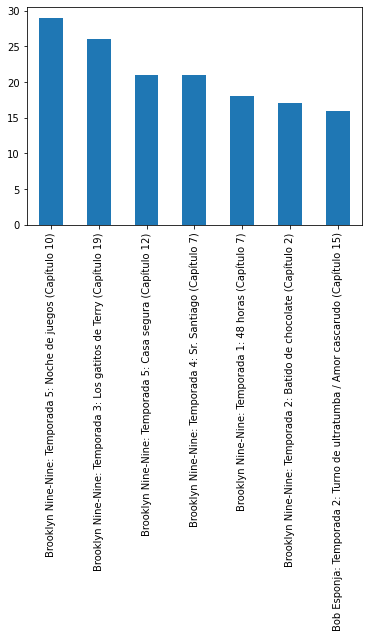

In [521]:
#TOP 7: Series con mas recuentos de reproducción
condicion = (df["type"] != "movie") & (df["type"] != "bonus")
df[condicion]["title"].value_counts().head(7).plot.bar()

<AxesSubplot:>

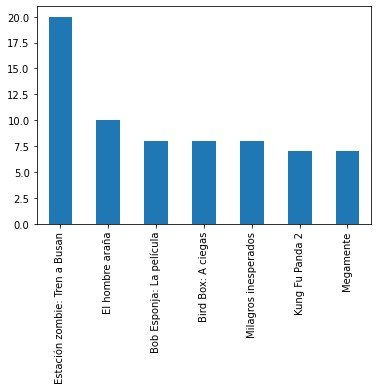

In [522]:
#Top 7: Títulos que son películas con mas reproducciones
condicion = (df["type"] != "series") & (df["type"] != "bonus")
df[condicion]["title"].value_counts().head(7).plot.bar()

In [523]:
#Convertimos la duración a un dato entero, tomaremos en cuenta en torno a los minutos reproducidors
def convers_duration(cadena):
    lista = cadena[1:].split(":")
    return int(lista[0]) * 60 + int(lista[1])

In [524]:
#Transformamos la columna "duration"
df["duration"] = df["duration"].apply(convers_duration)

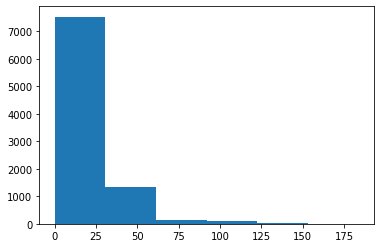

In [525]:
#Ahora podemos visualizar la frecuencia según el tiempo de retención (x minuto) de cada título en un histograma.
plt.hist(df["duration"], bins=6)
plt.show()

* Visualizamos que existe una concentración en las visualizaciones que duran de 0 a 25 min, y en menor mendida los que duran 50 min. Siendo escasas las que duran más a 75 min

In [526]:
#Hallemos el tipo de titúlos que tienden a ser de menor retención. 
condicion = df["duration"] < 2 #consideramos poca retención de 2 min para abajo. 
df[condicion]

,time_start,duration,atributes,title,suple_type,device,date,type
4,13:32:15,0,Autoplayed: user action: None,Tiger & Bunny: TIGER & BUNNY: Season 1_hook_01...,HOOK,Sony Sony Android TV 2018 M2 4K Smart TV,2022-04-11,bonus
5,13:32:07,0,Autoplayed: user action: None,Better Call Saul: Season 3_hook_primary_16x9,HOOK,Sony Sony Android TV 2018 M2 4K Smart TV,2022-04-11,bonus
7,23:51:36,0,Autoplayed: user action: None,Tráiler: Regreso al espacio,TRAILER,Sony Sony Android TV 2018 M2 4K Smart TV,2022-04-10,bonus
8,23:50:08,0,NaN,Seinfeld: Temporada 9: La rasurada con mantequ...,NaN,Sony Sony Android TV 2018 M2 4K Smart TV,2022-04-10,series
9,23:49:52,0,Autoplayed: user action: None,Seinfeld: Seinfeld: Season 9_hook_primary_16x9,HOOK,Sony Sony Android TV 2018 M2 4K Smart TV,2022-04-10,bonus
...,...,...,...,...,...,...,...,...
9126,22:17:47,0,Autoplayed: user action: None,Little Witch Academia,NaN,Sony PS4,2018-06-13,movie
9127,22:16:24,0,Autoplayed: user action: None,Dr. House: Temporada 1: House - Pilot (Capítul...,NaN,Sony PS4,2018-06-13,series
9129,21:45:17,0,NaN,The Seven Deadly Sins: Los Siete Pecados Capit...,NaN,Sony PS4,2018-06-13,series
9137,21:03:12,1,NaN,Sword Art Online: Sword Art Online II: Phantom...,NaN,Sony PS4,2018-05-23,series


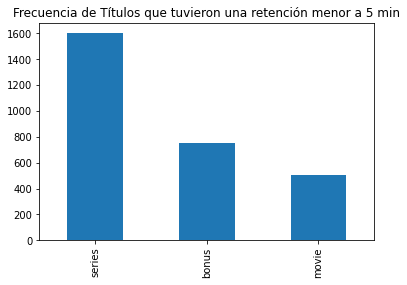

In [527]:
df[condicion]["type"].value_counts().plot.bar()
plt.title("Frecuencia de Títulos que tuvieron una retención menor a 5 min")
plt.show()

* Por lo mostrado podemos ver que las series son propensas a dejar de reproducirse en el intervalo de 2 minutos. 
* Los materiales bonus también, pero esto se explica dado a la duración de estos. 
* Mientras tanto un menor numero de veces una película fue detenida en aquel intervalo de tiempo (2 minutos)

In [528]:
#Hallemos qué tipo de títulos tuvieron mayor recepción #veamos a que podemos Considerar una retención alta
condicion = df["duration"] > 75 #Consideraremos de retención alta aquellas que superan los 75 min
df[condicion]

,time_start,duration,atributes,title,suple_type,device,date,type
112,13:57:20,101,Autoplayed: user action: User_Interaction,La familia Mitchell vs. las máquinas,NaN,Sony Sony Android TV 2018 M2 4K Smart TV,2022-04-03,movie
155,14:04:34,109,Autoplayed: user action: User_Interaction,Crimen perfecto,NaN,Sony Sony Android TV 2018 M2 4K Smart TV,2022-03-30,movie
162,18:34:48,96,Autoplayed: user action: User_Interaction,El proyecto Adam,NaN,Sony Sony Android TV 2018 M2 4K Smart TV,2022-03-29,movie
166,14:14:34,118,Autoplayed: user action: User_Interaction,El Hombre Araña 3,NaN,Sony Sony Android TV 2018 M2 4K Smart TV,2022-03-27,movie
261,18:46:31,90,Autoplayed: user action: User_Interaction,El mundo perdido: Parque Jurásico,NaN,Sony Sony Android TV 2018 M2 4K Smart TV,2022-02-01,movie
...,...,...,...,...,...,...,...,...
8950,21:07:07,86,Autoplayed: user action: Unspecified,ENEMIGO A LAS PUERTAS,NaN,Sony PS4,2018-07-20,movie
9058,04:18:41,79,Autoplayed: user action: Unspecified,The Texas Chainsaw Massacre 2,NaN,Sony PS4,2018-07-11,movie
9084,20:03:19,136,Autoplayed: user action: Unspecified,La isla siniestra,NaN,Sony PS4,2018-07-07,movie
9112,01:24:33,148,Autoplayed: user action: Unspecified,Gladiador,NaN,Sony PS4,2018-06-23,movie


* Tras una pequeña comprobación, constatamos que los títulos que poseen una retención de 75 min a más, son todos películas. 

# No obstante

* Es posible que este análisis no sea adecuado.
* Si bien en efecto es lógico que una película poseea más retención
* Lo cierto es que las series como un conjunto puede que tengan más dada a la cantidad de sus capítulos
* Para darnos una idea, sumaremos todas las duraciones que recayeron en series, y las compararemos con las películas. 

In [529]:
condicion = df["type"] == "movie"
df[condicion]["duration"].sum()

35238

* Hemos consumido en total 35,238 min en cuanto a contenido de películas. 

In [530]:
condicion = df["type"] == "series"
df[condicion]["duration"].sum()

123208

* Hemos consumido en total 123,208 min en cuanto a series

Hemos comprobado algo importante, y es que la intuición o primeros vistazos pueden ser engañosos. 
* Como dijimos una película por sí sola es buena reteniendo audiencia, pero es por su propia naturaleza. 
* Una serie, si bien cada capítulo suele ser menor a la duración de una película, a la larga suele retener mucho más al consumidor, dado a que se requieren de mas sesiones para completarla. 


In [531]:
#Renombramos la columna duration como duration_min
df.columns = ['time_start', 'duration_min', 'atributes', 'title', 'suple_type', 'device',
       'date', 'type']

In [532]:
df

,time_start,duration_min,atributes,title,suple_type,device,date,type
0,18:38:28,13,NaN,La vida desastrosa de Saiki K.: Temporada 2: E...,NaN,Sony Sony Android TV 2018 M2 4K Smart TV,2022-04-11,series
1,18:13:46,20,Autoplayed: user action: User_Interaction,La vida desastrosa de Saiki K.: Temporada 2: E...,NaN,Sony Sony Android TV 2018 M2 4K Smart TV,2022-04-11,series
2,13:41:14,19,NaN,La vida desastrosa de Saiki K.: Temporada 2: E...,NaN,Sony Sony Android TV 2018 M2 4K Smart TV,2022-04-11,series
3,13:32:44,8,NaN,La vida desastrosa de Saiki K.: Temporada 2: E...,NaN,Sony Sony Android TV 2018 M2 4K Smart TV,2022-04-11,series
4,13:32:15,0,Autoplayed: user action: None,Tiger & Bunny: TIGER & BUNNY: Season 1_hook_01...,HOOK,Sony Sony Android TV 2018 M2 4K Smart TV,2022-04-11,bonus
...,...,...,...,...,...,...,...,...
9135,21:21:51,2,NaN,Sword Art Online: Sword Art Online II: Un pequ...,NaN,Sony PS4,2018-05-23,series
9136,21:04:49,14,Autoplayed: user action: Unspecified,Sword Art Online: Sword Art Online II: Phantom...,NaN,Sony PS4,2018-05-23,series
9137,21:03:12,1,NaN,Sword Art Online: Sword Art Online II: Phantom...,NaN,Sony PS4,2018-05-23,series
9138,20:42:08,20,NaN,Sword Art Online: Sword Art Online II: Bala fa...,NaN,Sony PS4,2018-05-23,series


In [533]:
#Reducimos aun más nuestra tabla. 

* Nos desharemos de los "atributes","suple_type"

In [534]:
df.drop(columns=["atributes","suple_type"],inplace=True)

* Resumiremos a los dispositivos por Marca del Dispositivo

In [535]:
df

,time_start,duration_min,title,device,date,type
0,18:38:28,13,La vida desastrosa de Saiki K.: Temporada 2: E...,Sony Sony Android TV 2018 M2 4K Smart TV,2022-04-11,series
1,18:13:46,20,La vida desastrosa de Saiki K.: Temporada 2: E...,Sony Sony Android TV 2018 M2 4K Smart TV,2022-04-11,series
2,13:41:14,19,La vida desastrosa de Saiki K.: Temporada 2: E...,Sony Sony Android TV 2018 M2 4K Smart TV,2022-04-11,series
3,13:32:44,8,La vida desastrosa de Saiki K.: Temporada 2: E...,Sony Sony Android TV 2018 M2 4K Smart TV,2022-04-11,series
4,13:32:15,0,Tiger & Bunny: TIGER & BUNNY: Season 1_hook_01...,Sony Sony Android TV 2018 M2 4K Smart TV,2022-04-11,bonus
...,...,...,...,...,...,...
9135,21:21:51,2,Sword Art Online: Sword Art Online II: Un pequ...,Sony PS4,2018-05-23,series
9136,21:04:49,14,Sword Art Online: Sword Art Online II: Phantom...,Sony PS4,2018-05-23,series
9137,21:03:12,1,Sword Art Online: Sword Art Online II: Phantom...,Sony PS4,2018-05-23,series
9138,20:42:08,20,Sword Art Online: Sword Art Online II: Bala fa...,Sony PS4,2018-05-23,series


In [536]:
df["device"].value_counts()

Sony Sony Android TV 2018 M2 4K Smart TV          3803
Sony PS4                                          3617
Android DefaultWidevineL3Phone Android Phone       578
Chrome PC (Cadmium)                                493
Android DefaultWidevineL3Tablet Android Tablet     190
LG 2017 LG M16p Standard UHD TV Smart TV           179
Netflix Windows App - Cadmium Windows Mobile       159
Samsung 2018 Kant-M2 UHD TV (1.5G) Smart TV         59
DefaultWidevineAndroidPhone                         47
Samsung 2014 MStar DTV                              10
Samsung 2013 MStar X12 Smart TV                      4
LG 2018 Mstar LM18A STD UHD TV Smart TV              1
Name: device, dtype: int64

In [537]:
lista = [elemento.split()[0] for elemento in df["device"]]

In [538]:
df["device"] = lista

In [539]:
df["device"].value_counts()

Sony                           7420
Android                         768
Chrome                          493
LG                              180
Netflix                         159
Samsung                          73
DefaultWidevineAndroidPhone      47
Name: device, dtype: int64

In [540]:
df["device"] = df["device"].replace("Chrome","PC")
df["device"] = df["device"].replace("Netflix","Windows App")
df["device"] = df["device"].replace("DefaultWidevineAndroidPhone","Default Phone")

In [541]:
df["device"].value_counts()

Sony             7420
Android           768
PC                493
LG                180
Windows App       159
Samsung            73
Default Phone      47
Name: device, dtype: int64

# Obtenemos Nuestra Tabla Resumida

In [542]:
df

,time_start,duration_min,title,device,date,type
0,18:38:28,13,La vida desastrosa de Saiki K.: Temporada 2: E...,Sony,2022-04-11,series
1,18:13:46,20,La vida desastrosa de Saiki K.: Temporada 2: E...,Sony,2022-04-11,series
2,13:41:14,19,La vida desastrosa de Saiki K.: Temporada 2: E...,Sony,2022-04-11,series
3,13:32:44,8,La vida desastrosa de Saiki K.: Temporada 2: E...,Sony,2022-04-11,series
4,13:32:15,0,Tiger & Bunny: TIGER & BUNNY: Season 1_hook_01...,Sony,2022-04-11,bonus
...,...,...,...,...,...,...
9135,21:21:51,2,Sword Art Online: Sword Art Online II: Un pequ...,Sony,2018-05-23,series
9136,21:04:49,14,Sword Art Online: Sword Art Online II: Phantom...,Sony,2018-05-23,series
9137,21:03:12,1,Sword Art Online: Sword Art Online II: Phantom...,Sony,2018-05-23,series
9138,20:42:08,20,Sword Art Online: Sword Art Online II: Bala fa...,Sony,2018-05-23,series


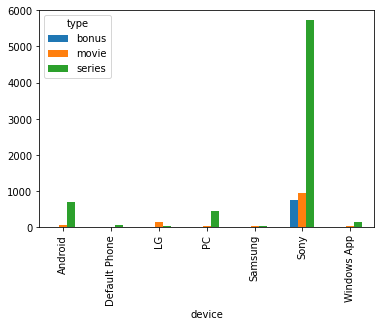

In [544]:
#Frecuencias de visualizaciones agrupadas por tipo de título, y el dispositivo donde se produjo
group_device = df.groupby(["type","device"]).size()
group_device.unstack(level = 0).plot.bar()
plt.show()